In [17]:
%load_ext autoreload
%autoreload 2
from fastIsing import Ising
import infcy, networkx as nx, IO
from numpy import *
from matplotlib.pyplot import *
from tqdm import tqdm_notebook as tqdm
from scipy.optimize import curve_fit
from tqdm import tqdm_notebook as tqdm


N     = 16
# graph = nx.grid_2d_graph(N, N, True)
s = nx.utils.powerlaw_sequence(100, 1.6)
graph = nx.expected_degree_graph(s, selfloops = False)
model = Ising(graph = graph, temperature = 0, updateMethod = 'glauber')




The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
No burnin used


/home/casper/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in double_scalars
/home/casper/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in double_scalars


In [26]:
model.reset()
n = int(1e3)
temps = logspace(0, 1, 20)
mag   = zeros(len(temps))
for idx, t in enumerate(tqdm(temps)):
    model.t = t
#     for i in range(5):
    model.reset(n)
    res = model.simulate(n)
    mag[idx] += abs(res.mean()) #=/ 5
        

> [4.08409123]


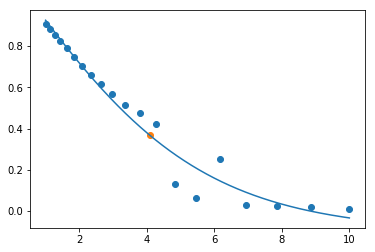

(1001, 100)


In [37]:
model.t = 0
# model.reset(100)
# res = model.simulate(100)
from scipy import optimize
fig, ax = subplots();
ax.scatter(temps, mag)
func = lambda x, a, b, c : tanh(-a * x)* b + c
a, b = curve_fit(func, temps, mag)
f_root = lambda x, a, c: func(x, *a) - c
r = optimize.root(f_root, 0, args = (a, 1/np.e))

print('>', r.x)
x = linspace(min(temps), max(temps), 1000)
ax.plot(x, func(x, *a))
ax.scatter(r.x, func(r.x, *a))
show()



In [43]:
model.sampleNodes[model.mode](model.nodeIDs)

array([93, 21, 28, 40, 62, 38, 66, 57, 27, 42, 11, 49, 35, 69, 91, 95, 32,
       20,  9, 65, 55, 52, 94, 88, 43,  7,  0, 72, 87, 63, 59,  4, 71,  8,
        2, 23, 18, 33, 14, 39, 86, 48, 26,  6, 53, 24, 46, 12, 83, 75, 82,
       15, 78, 81, 51, 19, 54, 84, 45, 80, 10,  5, 34, 99, 58, 44, 85, 68,
       25, 61,  3, 36, 29, 97, 64, 67, 50, 16, 13, 70, 17, 47, 76,  1, 31,
       92, 77, 96, 74, 90, 98, 22, 56, 37, 89, 73, 60, 41, 30, 79])

<IPython.core.display.Javascript object>


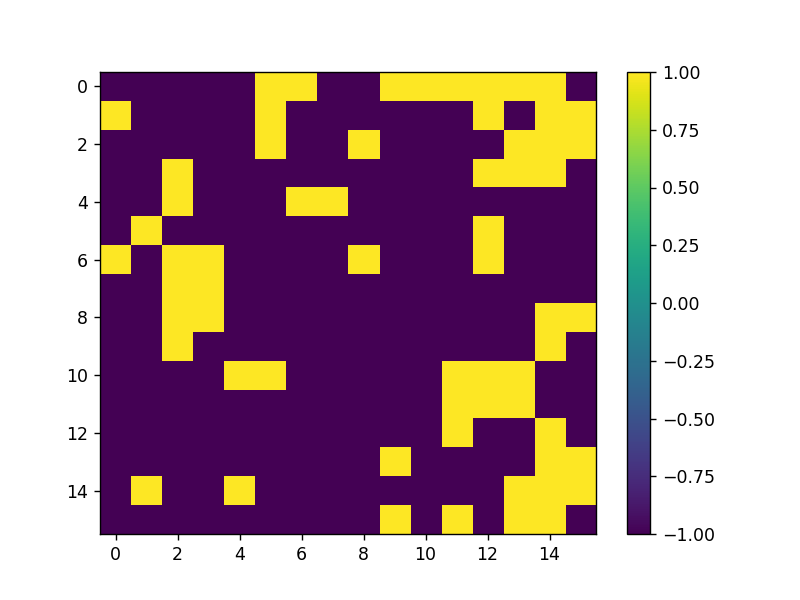

interactive(children=(IntSlider(value=0, description='frame', max=1000), Output()), _dom_classes=('widget-inte…

In [3]:
# temporar function to show the results interactive
%matplotlib notebook
from ipywidgets import interact, interactive
from ipywidgets.embed import embed_minimal_html
from IPython.display import display
import numpy as np
def disp(images):
    N = len(images)
    nNodes = int(sqrt(images.shape[1]))
    fig, ax = subplots()
    h = ax.imshow(images[0, :].reshape(nNodes, nNodes), aspect = 'auto')
    colorbar(h, ax = ax)
    def view(frame = 0):
        h.set_data(images[frame, :].reshape(nNodes, nNodes))
        fig.canvas.draw_idle()
    interact(view, frame = (0, N -1))
disp(res)